#### 숫자예측 모델(LSTM)

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Data (random num sequence)
data = np.array([i for i in range(1,21)])
timesteps = 3 # 타임스텝 길이

In [4]:
x_data = []
y_data = []

In [5]:
# 타임스텝에 따라 입력 데이터와 출력 데이터 생성
for i in range(len(data) - timesteps):
    x_data.append(data[i:i+timesteps]) #입력(2개의 숫자)
    y_data.append(data[i + timesteps]) # 출력(다음숫자)
    
x_data = np.array(x_data).reshape(-1, timesteps, 1) # (sample num, timestep, feature num)
y_data = np.array(x_data) # 출력값

In [6]:
# LSTM model definition
model = Sequential([
    LSTM(10, input_shape=(timesteps, 1)), # lstm layer(unit : 10)
    Dense(1) # 출력 layer
])

c:\AI_project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse')

In [9]:
# 3. 모델 학습
model.fit(x_data, y_data, epochs=1000, verbose=1)  # 100번 반복 학습

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.9159
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.9036
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.8913
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.8791
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.8669
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.8547
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.8425
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.8304
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.8183
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.8062
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.7942
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.7822
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.7702
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.7583
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.7463
Epoc

In [10]:
# 4. 예측 테스트
test_input = np.array([18, 19, 20]).reshape(1, timesteps, 1)  # 입력 예시
predicted_value = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [11]:
# 결과 출력
print("입력 데이터:", test_input.flatten()) # flatten함수 : [[1,2],[3,4]] --> [1,2,3,4]
print("예측 값:", predicted_value[0][0])

입력 데이터: [18 19 20]
예측 값: 15.373574


In [1]:
# sys.path 확인
# Jupyter Notebook에서 현재 Python 경로에 포함된 패키지 경로를 확인하세요.
import sys
print(sys.executable)

c:\AI_project\.venv\Scripts\python.exe


In [12]:
# TensorFlow 직접 로드 확인
# Jupyter Notebook에서 TensorFlow를 직접 불러와 문제를 확인하세요.
import tensorflow as tf
print(tf.__version__)

2.18.0


#### 기온예측 모델(RNN)

In [15]:
# library
import numpy as np
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [18]:
# 1. 데이터 로드
file_path = "dataset/jena_climate_2009.csv"
data = pd.read_csv(file_path)

In [19]:
# 데이터 확인
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [20]:
# 'T (degC)' 열이 기온 데이터
temperature = data['T (degC)'].values

In [21]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 정규화
scaled_data = scaler.fit_transform(temperature.reshape(-1, 1))

In [22]:
# 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [23]:
look_back = 60  # 과거 60시간 데이터를 기반으로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # RNN 입력 형태

In [24]:
# 데이터 분리
train_size = int(len(X) * 0.8)  # 80% 학습 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [25]:
# 3. RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

c:\AI_project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0019 - val_loss: 2.8919e-04
Epoch 2/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.5329e-05 - val_loss: 1.6132e-04
Epoch 3/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.2068e-05 - val_loss: 5.9693e-05
Epoch 4/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.4705e-05 - val_loss: 5.5736e-05
Epoch 5/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.2466e-05 - val_loss: 9.8337e-05


In [27]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 정규화 복원

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
# 실제 값 복원
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

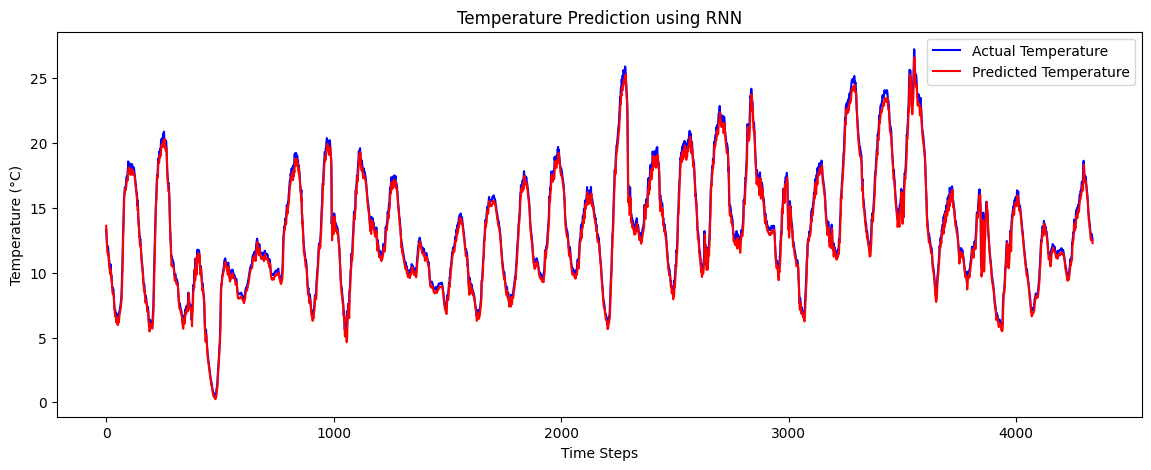

In [29]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_values, label="Actual Temperature", color='blue')
plt.plot(predictions, label="Predicted Temperature", color='red')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

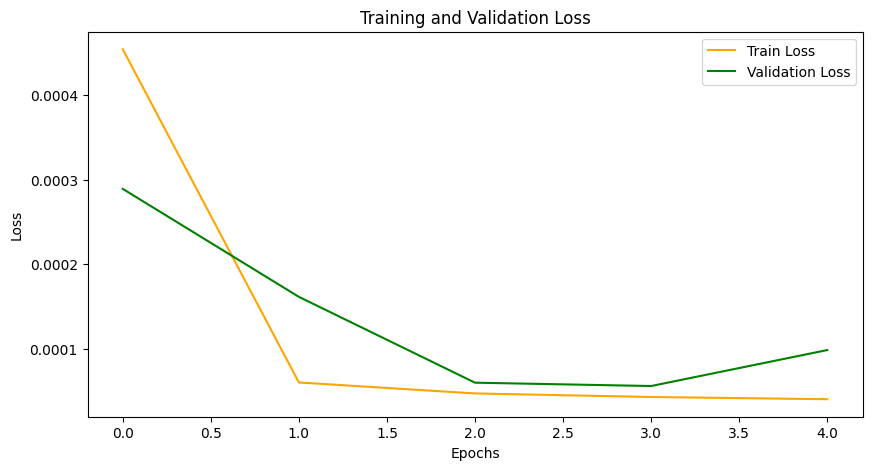

In [30]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 주가예측 모델(LSTM)

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [1]:
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 수집
ticker = "AAPL"  # 예: 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가만 사용

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.347170
2015-01-05,23.661274
2015-01-06,23.663502
2015-01-07,23.995314
2015-01-08,24.917265


In [5]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [7]:
look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM 입력 형태

In [8]:
# model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)), # 50 : 뉴런 수
    LSTM(50),
    Dense(1)
])

c:\AI_project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='MSE')

In [10]:
# model training
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0232 - val_loss: 0.0016
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.9436e-04 - val_loss: 0.0015
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.7547e-04 - val_loss: 0.0015
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.4951e-04 - val_loss: 0.0014
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.9740e-04 - val_loss: 0.0013
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.4692e-04 - val_loss: 0.0012
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.5267e-04 - val_loss: 0.0012
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.0922e-04 - val_loss: 0.0012
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.9915e-04 - val_loss: 0.0011
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.7511e-04 - val_loss: 9.5114e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.7045e-04 - val_loss: 0.0011
Epoch 12/20
56/56 ━

In [11]:
# prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [13]:
# actual val 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

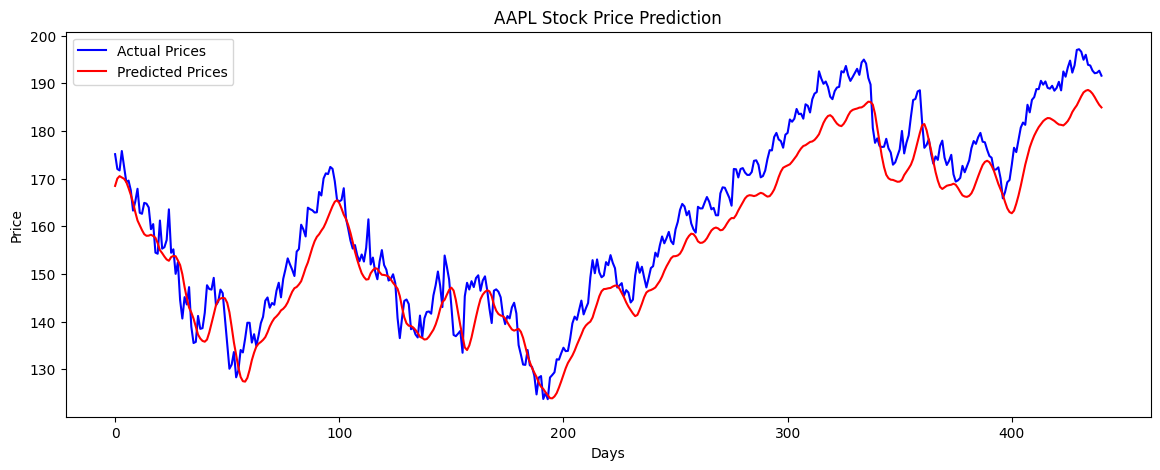

In [14]:
# visualize
plt.figure(figsize=(14,5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

#### 주가예측 모델(GRU) 
> lstm과 비슷함, parameter를 줄임, lstm의 slim한 버전

In [2]:
# library
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


In [3]:
# data
ticker = "AAPL" # apple stock
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']] # 종가 데이터만 사용

[*********************100%***********************]  1 of 1 completed


In [4]:
# preprocessing
scaler = MinMaxScaler(feature_range=(0,1)) # data를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

In [5]:
# GPU model에 적합한 dataset 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [6]:
look_back = 60 # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # GRU 입력 형태

In [7]:
# GPU model
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1],1)),
    GRU(50),
    Dense(1)
])
model. compile(optimizer='adam', loss='MSE')

c:\AI_project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# model training
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0279 - val_loss: 9.0487e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3132e-04 - val_loss: 6.3040e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.6485e-04 - val_loss: 5.3726e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.8936e-04 - val_loss: 4.8831e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.6329e-04 - val_loss: 4.7078e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.2590e-04 - val_loss: 4.9110e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.4075e-04 - val_loss: 4.4680e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.3405e-04 - val_loss: 4.7740e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.3036e-04 - val_loss: 3.8546e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.3329e-04 - val_loss: 3.7209e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.1890e-04 - 

In [10]:
# prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1)) # 정규화 복원

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [11]:
# actual value
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

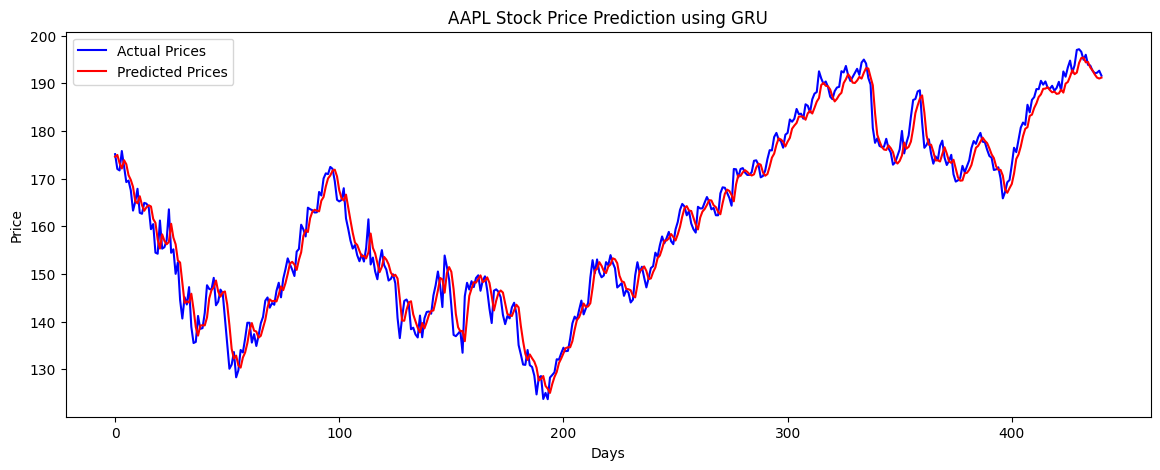

In [12]:
# visualize
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()